# 1 importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pickle

# 2.Loading dataset using pandas

load datasets for Heart Disese prediction using external file
https://www.kaggle.com/johnsmith88/heart-disease-dataset

In [2]:
file='heartdisease2.csv'
df=pd.read_csv(file)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# 3.Feature Engineering

What is a feature and why we need the engineering of it? Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises. I think feature engineering efforts mainly have two goals:
Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
Improving the performance of machine learning models.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
#description of datasets include mean,std etc

In [5]:
pd.set_option("display.width",100)
pd.set_option('precision',1)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0
mean,54.4,0.7,0.9,131.6,246.0,0.1,0.5,149.1,0.3,1.1,1.4,0.8,2.3,0.5
std,9.1,0.5,1.0,17.5,51.6,0.4,0.5,23.0,0.5,1.2,0.6,1.0,0.6,0.5
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.8,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#using iloc and loc function we can extract any row and column from the dataframe

In [8]:
print(df.iloc[0])

age          52.0
sex           1.0
cp            0.0
trestbps    125.0
chol        212.0
fbs           0.0
restecg       1.0
thalach     168.0
exang         0.0
oldpeak       1.0
slope         2.0
ca            2.0
thal          3.0
target        0.0
Name: 0, dtype: float64


In [9]:
df.iloc[1]


age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64

In [10]:
#given example extract all rows first column

In [11]:
df.iloc[:,0]

0       52
1       53
2       70
3       61
4       62
5       58
6       58
7       55
8       46
9       54
10      71
11      43
12      34
13      51
14      52
15      34
16      51
17      54
18      50
19      58
20      60
21      67
22      45
23      63
24      42
25      61
26      44
27      58
28      56
29      55
        ..
995     44
996     56
997     54
998     42
999     67
1000    64
1001    42
1002    66
1003    52
1004    51
1005    55
1006    58
1007    56
1008    42
1009    40
1010    51
1011    45
1012    48
1013    58
1014    44
1015    58
1016    65
1017    53
1018    41
1019    47
1020    59
1021    60
1022    47
1023    50
1024    54
Name: age, Length: 1025, dtype: int64

In [12]:
df.iloc[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
df.iloc[[1,2,3,4],[1,2,3,4]]

,sex,cp,trestbps,chol
1,1,0,140,203
2,1,0,145,174
3,1,0,148,203
4,0,0,138,294


In [14]:
df.loc[1]

age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64

In [15]:
df.loc[df['age']>10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# a )check the datatypes of the each feature or to check if their any null value exist

In [16]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [17]:
df.isna().any().any()



False

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

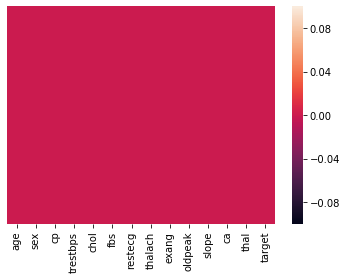

In [19]:
sns.heatmap(df.isnull(),yticklabels=False)

# There are 1025 rows and 14 columns including target

In [20]:
df.shape

(1025, 14)

The correaltion matrix shows how each feature related to each other which helps in further for feature extraction
In this matrix the diagonal shows 1 ,which means that each feature is related to itself..as we know
Neagative values  describe that the features are negatively correlated,it means if the value of one feature decreases value of the other feature will be increased
Positive values describe positive corelation between values.

In [21]:
pd.set_option('precision',3)
correlation=df.corr(method='pearson')
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.103,-0.072,0.271,0.220,0.121,-0.133,-0.390,0.088,0.208,-0.169,0.272,0.072,-0.229
sex,-0.103,1.000,-0.041,-0.079,-0.198,0.027,-0.055,-0.049,0.139,0.085,-0.027,0.112,0.198,-0.280
cp,-0.072,-0.041,1.000,0.038,-0.082,0.079,0.044,0.307,-0.402,-0.175,0.132,-0.176,-0.163,0.435
trestbps,0.271,-0.079,0.038,1.000,0.128,0.182,-0.124,-0.039,0.061,0.187,-0.120,0.105,0.059,-0.139
chol,0.220,-0.198,-0.082,0.128,1.000,0.027,-0.147,-0.022,0.067,0.065,-0.014,0.074,0.100,-0.100
fbs,0.121,0.027,0.079,0.182,0.027,1.000,-0.104,-0.009,0.049,0.011,-0.062,0.137,-0.042,-0.041
restecg,-0.133,-0.055,0.044,-0.124,-0.147,-0.104,1.000,0.048,-0.066,-0.050,0.086,-0.078,-0.021,0.134
thalach,-0.390,-0.049,0.307,-0.039,-0.022,-0.009,0.048,1.000,-0.380,-0.350,0.395,-0.208,-0.098,0.423
exang,0.088,0.139,-0.402,0.061,0.067,0.049,-0.066,-0.380,1.000,0.311,-0.267,0.108,0.197,-0.438
oldpeak,0.208,0.085,-0.175,0.187,0.065,0.011,-0.050,-0.350,0.311,1.000,-0.575,0.222,0.203,-0.438


In [22]:
print(df.corr()["target"].abs().sort_values(ascending=False))


target      1.000
oldpeak     0.438
exang       0.438
cp          0.435
thalach     0.423
ca          0.382
slope       0.346
thal        0.338
sex         0.280
age         0.229
trestbps    0.139
restecg     0.134
chol        0.100
fbs         0.041
Name: target, dtype: float64


# Skewness

Skew is the degree of distortion from normal distribution.

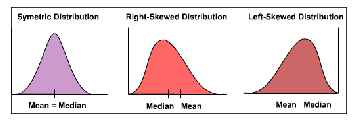

In [23]:
image = mpimg.imread("skewness (1).png")
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
skewness=df.skew()
skewness
column=['age','sex','cp','tres','chol','fbs','rest','thala','exan','old','sp','ca','tha','tg']


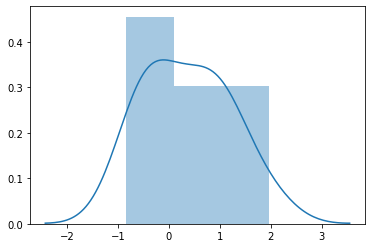

In [25]:
#sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(skewness,hist=True)

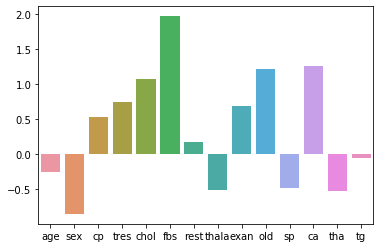

In [26]:
sns.barplot(column,skewness)

To check dataset is balanced or not

In [27]:
class_count=df.groupby('target').size()
class_count

target
0    499
1    526
dtype: int64

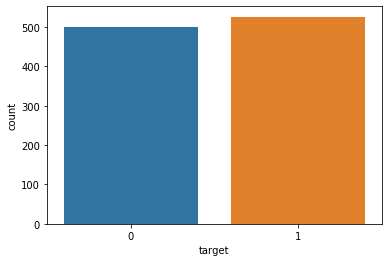

In [28]:
df.target.value_counts()
import seaborn as sn
sn.countplot(x='target',data=df)

# Data Visualization using matplotlib

Univariate and multivariate represent two approaches to statistical analysis.
    Univariate involves the analysis of a single variable while multivariate analysis examines two or more variables. Most multivariate analysis involves a dependent variable and multiple independent variables. 

1.univariate analysis using histogram and box,density plot.let's visualize.

a>Historams are constructed by binning the data and counting the number of observations in each bin.

The objective is usually to visualize the shape of the distribution.

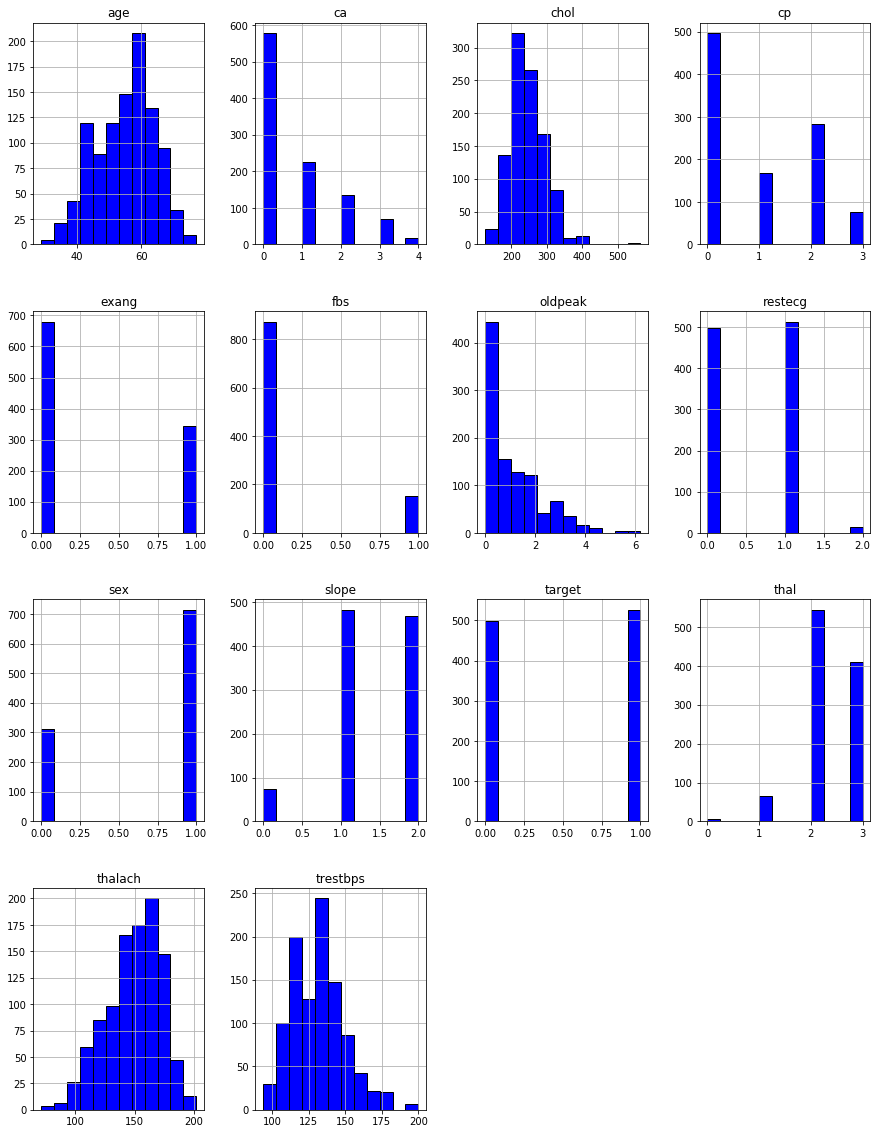

In [29]:
df.hist(figsize=(15,20),bins = int(180/15),color = 'blue', edgecolor = 'black')
plt.show()

b>Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. Boxplot is also used for detect the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups.

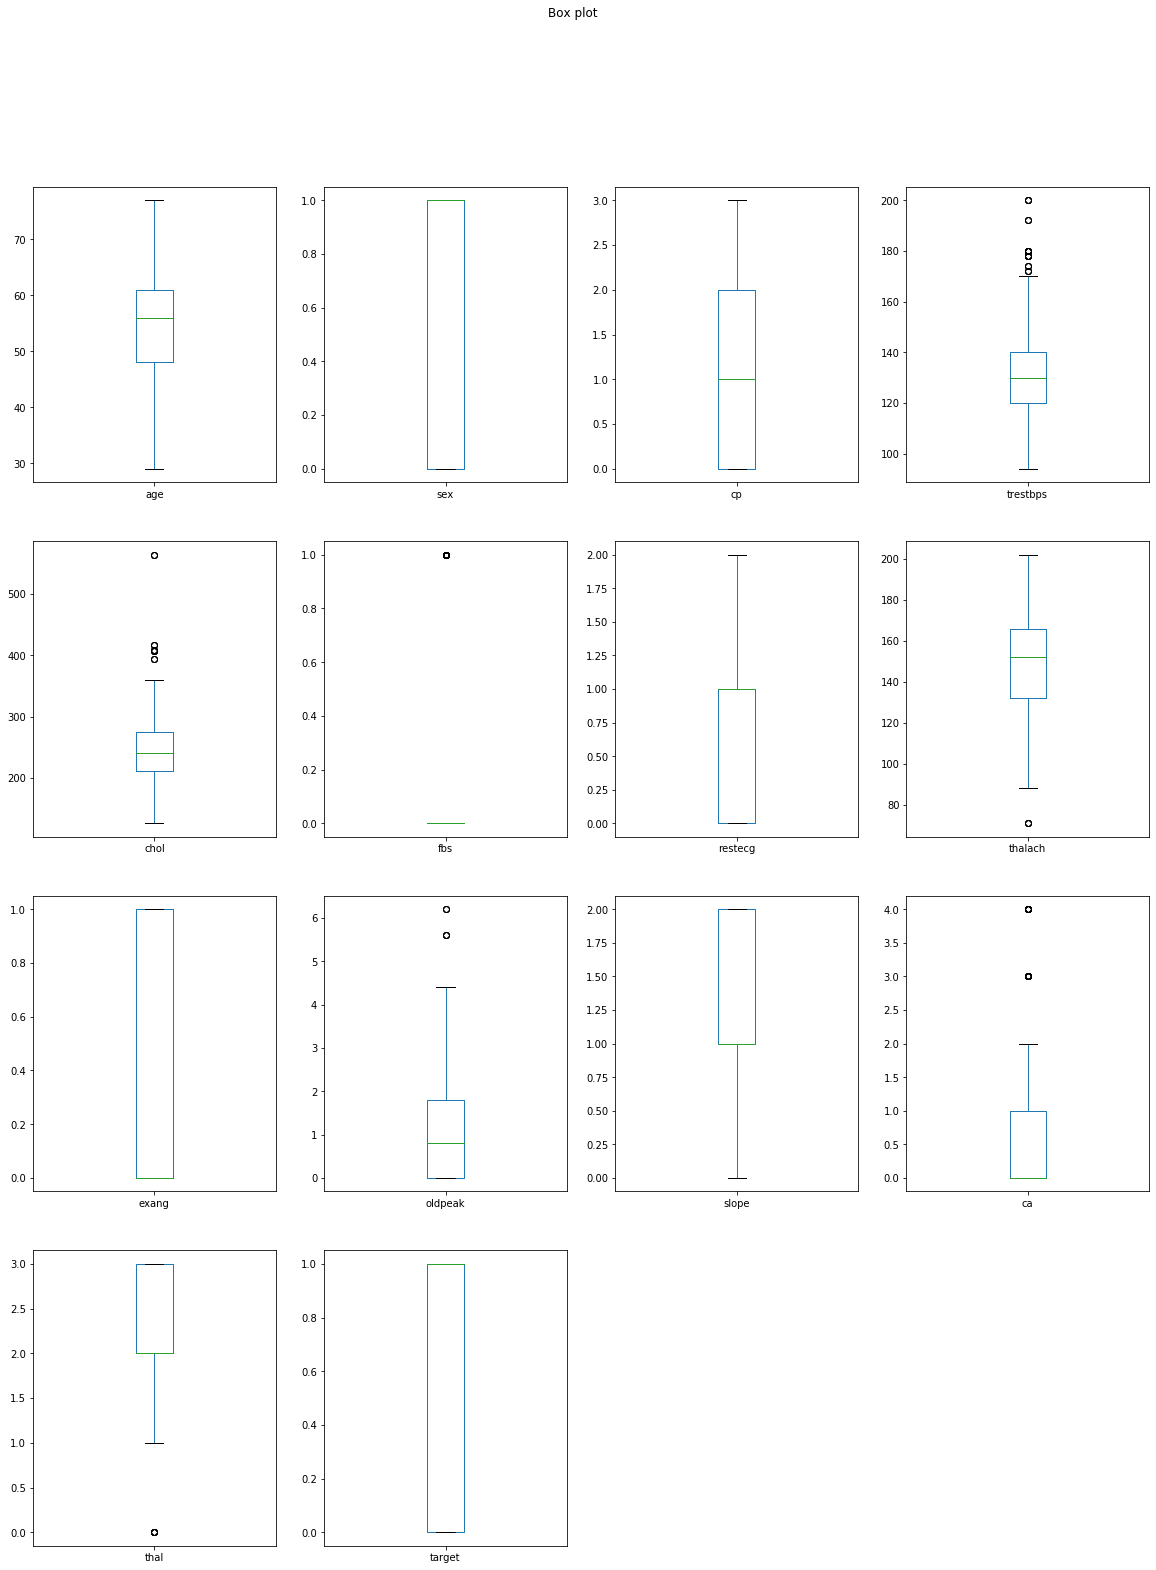

In [30]:
df.plot(title='Box plot',kind='box',subplots=True,layout=(4,4),legend=True,sharex=True,figsize=(20,25),sharey=False)
plt.show()

c>Density plots are used to study the distribution of one or a few variables. Checking the distribution of your variables one by one is probably the first task you should do when you get a new dataset.

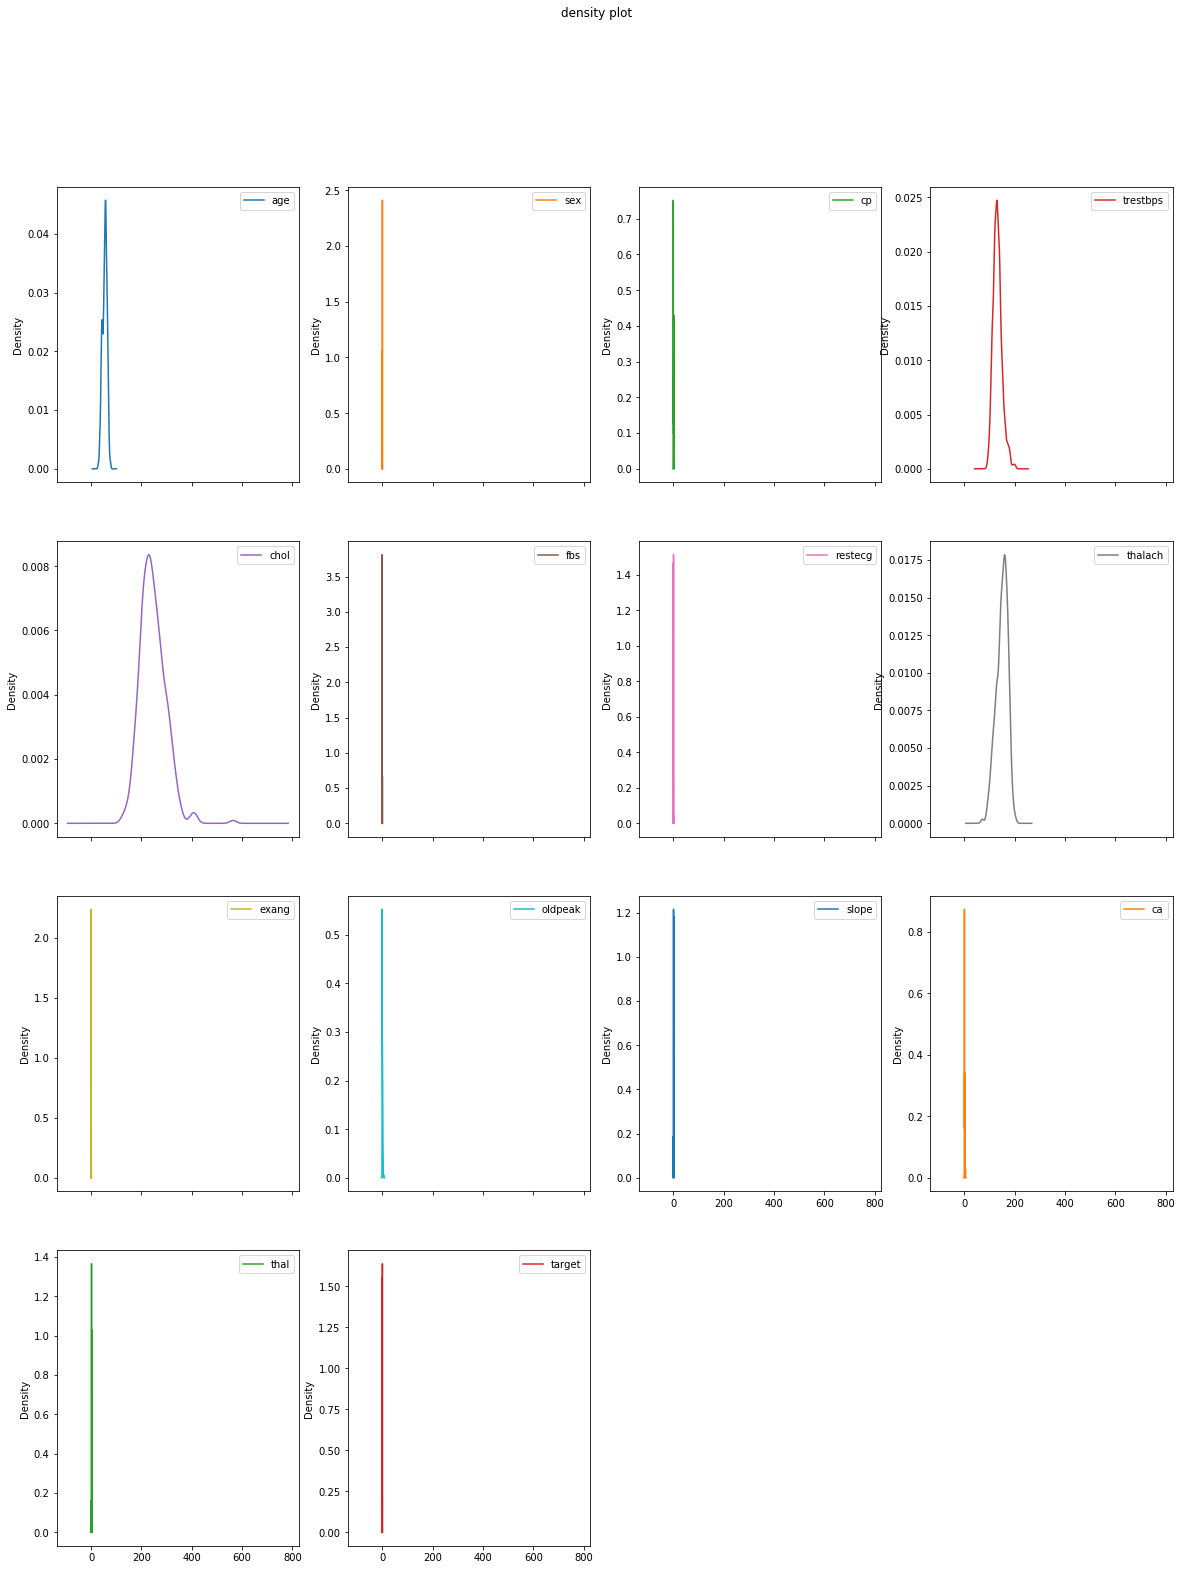

In [31]:
df.plot(title='density plot',kind='density',subplots=True,layout=(4,4),legend=True,sharex=True,figsize=(20,25),sharey=False)
plt.show()

# 2.multivariate analysis

In [32]:
from pandas.plotting import scatter_matrix

column=['age','sex','cp','tres','chol','fbs','rest','thala','exan','old','sp','ca','tha','tg']

In [33]:
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.103,-0.072,0.271,0.220,0.121,-0.133,-0.390,0.088,0.208,-0.169,0.272,0.072,-0.229
sex,-0.103,1.000,-0.041,-0.079,-0.198,0.027,-0.055,-0.049,0.139,0.085,-0.027,0.112,0.198,-0.280
cp,-0.072,-0.041,1.000,0.038,-0.082,0.079,0.044,0.307,-0.402,-0.175,0.132,-0.176,-0.163,0.435
trestbps,0.271,-0.079,0.038,1.000,0.128,0.182,-0.124,-0.039,0.061,0.187,-0.120,0.105,0.059,-0.139
chol,0.220,-0.198,-0.082,0.128,1.000,0.027,-0.147,-0.022,0.067,0.065,-0.014,0.074,0.100,-0.100
fbs,0.121,0.027,0.079,0.182,0.027,1.000,-0.104,-0.009,0.049,0.011,-0.062,0.137,-0.042,-0.041
restecg,-0.133,-0.055,0.044,-0.124,-0.147,-0.104,1.000,0.048,-0.066,-0.050,0.086,-0.078,-0.021,0.134
thalach,-0.390,-0.049,0.307,-0.039,-0.022,-0.009,0.048,1.000,-0.380,-0.350,0.395,-0.208,-0.098,0.423
exang,0.088,0.139,-0.402,0.061,0.067,0.049,-0.066,-0.380,1.000,0.311,-0.267,0.108,0.197,-0.438
oldpeak,0.208,0.085,-0.175,0.187,0.065,0.011,-0.050,-0.350,0.311,1.000,-0.575,0.222,0.203,-0.438


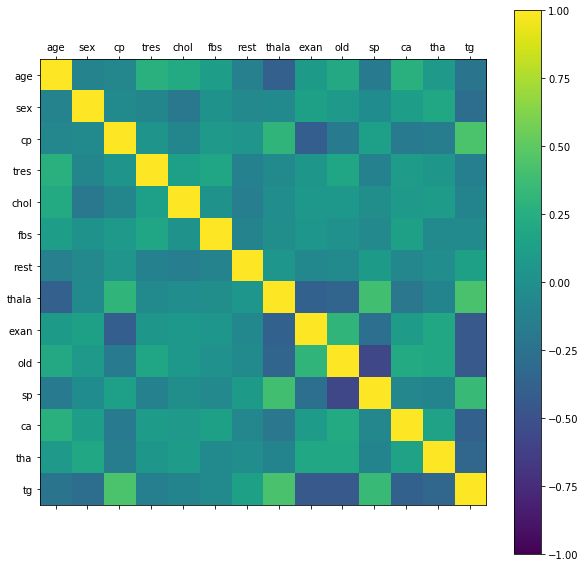

In [34]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
cax=ax.matshow(correlation,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(column)
ax.set_yticklabels(column)
plt.show()

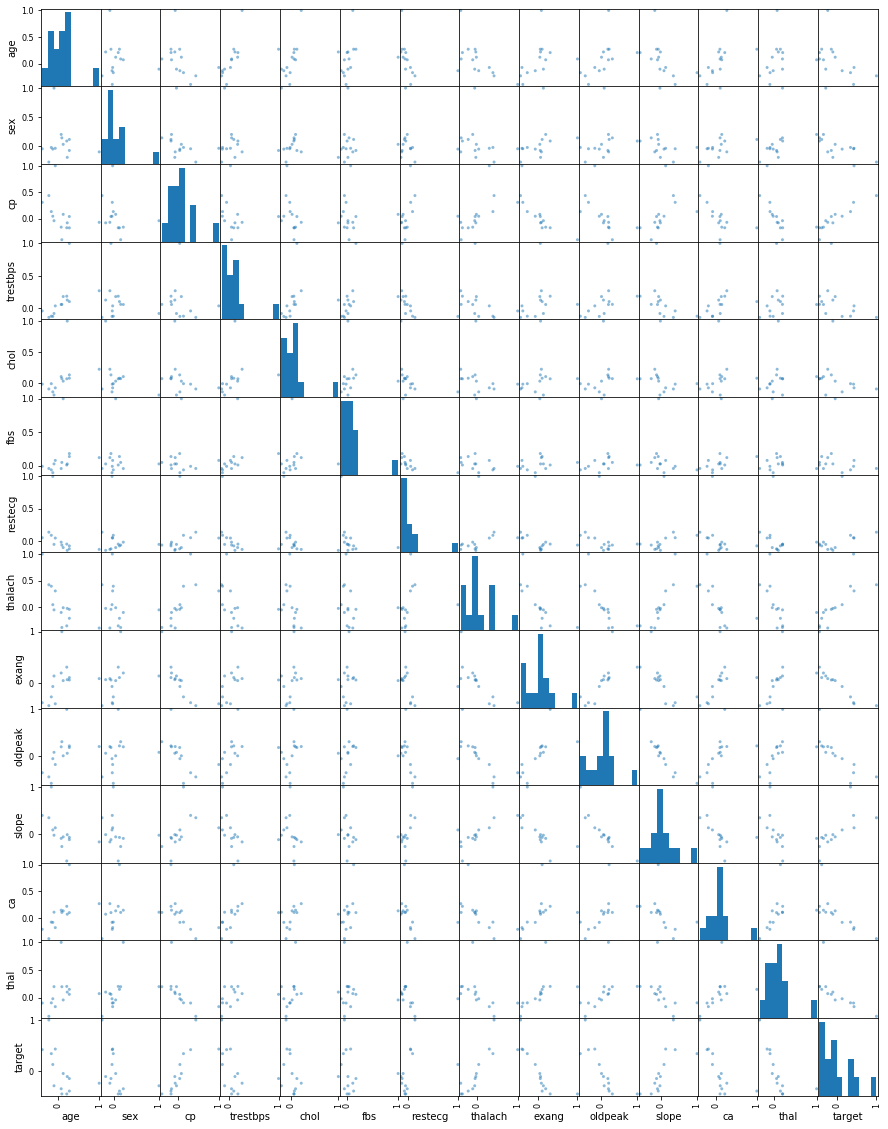

In [35]:
scatter_matrix(correlation,figsize=(15,20))
plt.show()

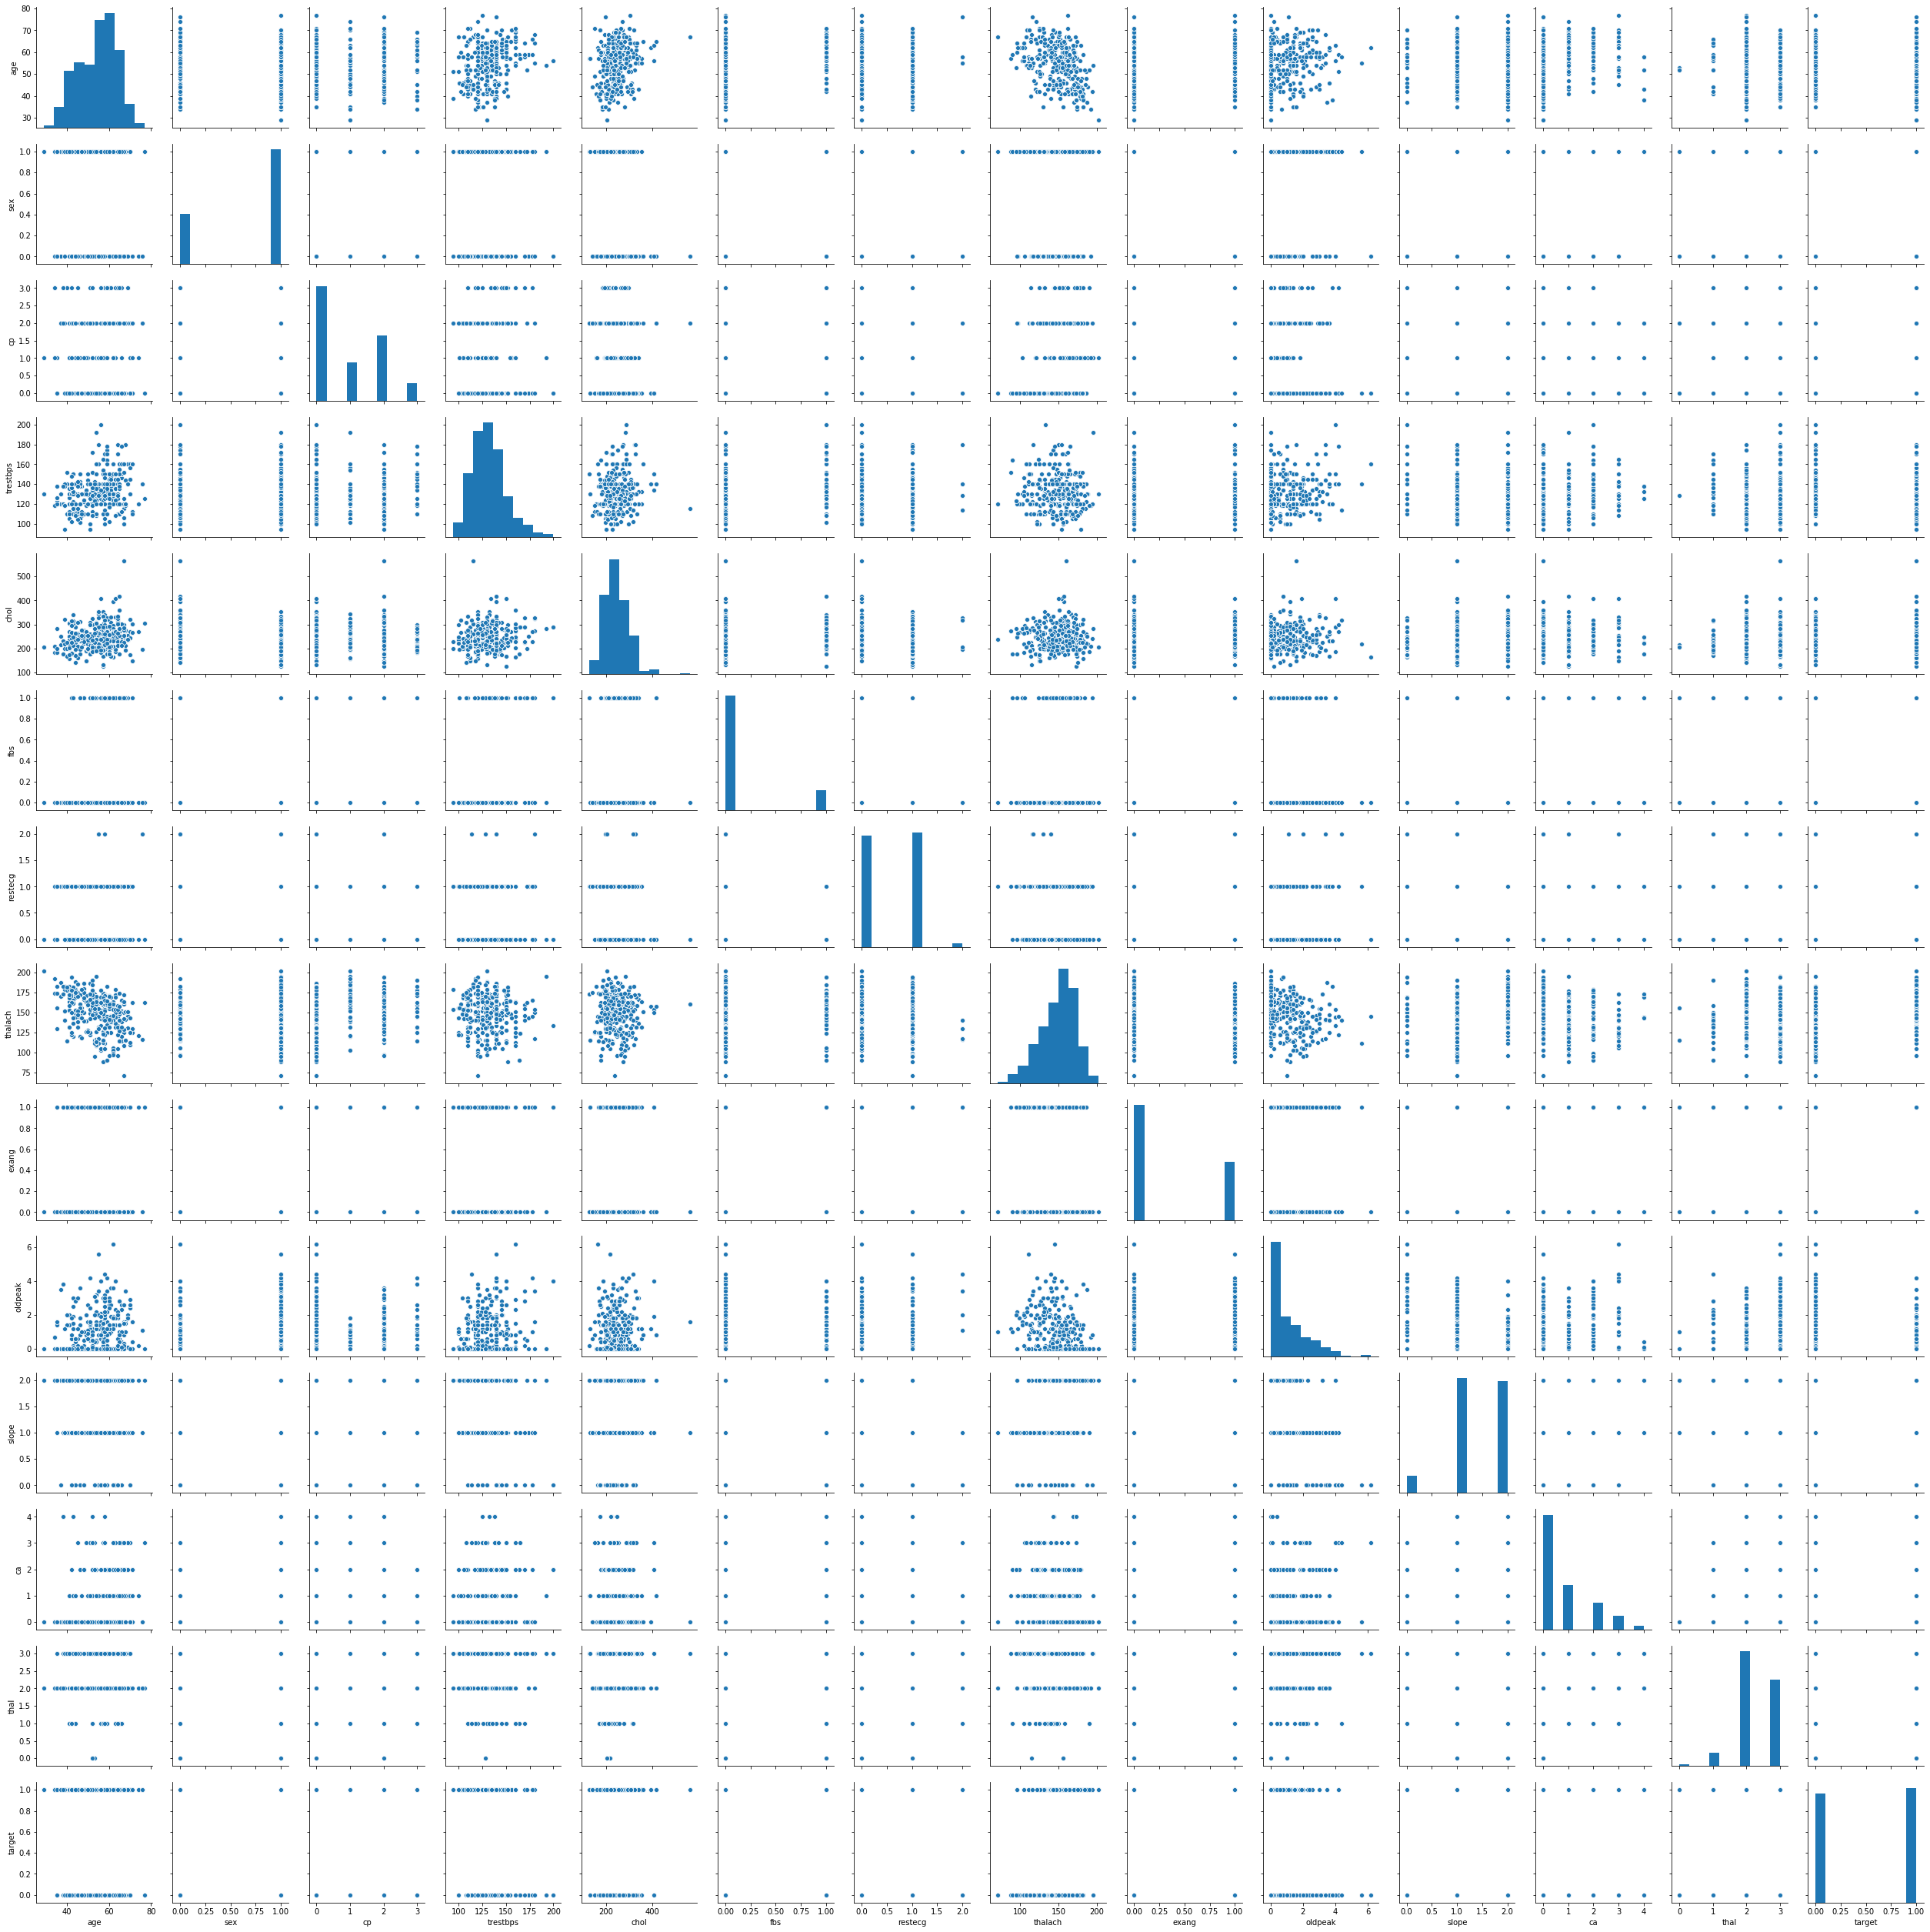

In [36]:
import seaborn as sns
sns.pairplot(df)

# 4 prepare the dataset


In [37]:
from sklearn import preprocessing

# standardization 

In [38]:
predicators = df.iloc[:, :-1].values
target= df.iloc[:, 13].values


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(predicators,target,test_size=0.20,random_state=7)

X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((820, 13), (820,), (205, 13), (205,))

In [40]:
standard_scaler=preprocessing.StandardScaler()

In [41]:
standard_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.fit_transform(X_test)

In [43]:
X_train.shape

(820, 13)

In [44]:
X_test.shape


(205, 13)

In [45]:
Y_test.shape

(205,)

In [46]:
Y_train.shape

(820,)

# 5.Applied Different classification algorithms

In [47]:
from sklearn.linear_model import LogisticRegression
classifier1 =LogisticRegression()
classifier1.fit(X_train,Y_train)


C:\Users\KITS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_Class_pred=classifier1.predict(X_test)


In [49]:
y_Class_pred.shape

(205,)

In [50]:
from sklearn.metrics import accuracy_score
score_lr = round(accuracy_score(Y_test,y_Class_pred)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 85.85 %


In [51]:
X = df.iloc[:, :-1].values
Y= df.iloc[:, 13].values

In [52]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier1,X,Y,cv=10)

C:\Users\KITS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KITS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KITS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KITS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KITS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [53]:
score

array([0.86407767, 0.90291262, 0.86407767, 0.83495146, 0.85436893,
       0.91262136, 0.80392157, 0.82352941, 0.78431373, 0.8019802 ])

In [54]:
score.mean()

0.844675461264002

In [55]:
score.std()

0.04064982501457888

# evaluation metrics

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
m=confusion_matrix(Y_test,y_Class_pred)

In [58]:
m

array([[78, 11],
       [18, 98]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_Class_pred))



              precision    recall  f1-score   support

           0       0.81      0.88      0.84        89
           1       0.90      0.84      0.87       116

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



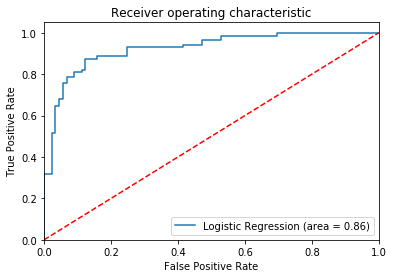

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier1.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [62]:
Y_pred_nb.shape
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 82.93 %


In [63]:
score=cross_val_score(nb,X,Y,cv=10)

In [64]:
score.mean()

0.8222501804720735

In [65]:
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        89
           1       0.86      0.84      0.85       116

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



# svm


In [66]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [67]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 86.83 %


In [68]:
score=cross_val_score(sv,X,Y,cv=10)
score

array([0.85436893, 0.90291262, 0.87378641, 0.82524272, 0.86407767,
       0.87378641, 0.80392157, 0.82352941, 0.7745098 , 0.81188119])

In [69]:
score.mean()

0.8408016729714092

In [70]:
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        89
           1       0.88      0.89      0.88       116

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



# K-nearest-neighbours

In [71]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [72]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 84.88 %


In [73]:
score=cross_val_score(knn,X,Y,cv=10)
score

array([0.75728155, 0.73786408, 0.74757282, 0.76699029, 0.80582524,
       0.75728155, 0.66666667, 0.74509804, 0.70588235, 0.7029703 ])

In [74]:
score.mean()

0.7393432889833815

In [75]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        89
           1       0.88      0.84      0.86       116

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



# chossing the K value

In [76]:
accuracy_rate=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,Y,cv=10)
    accuracy_rate.append(score.mean())
    

In [77]:
error_rate=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

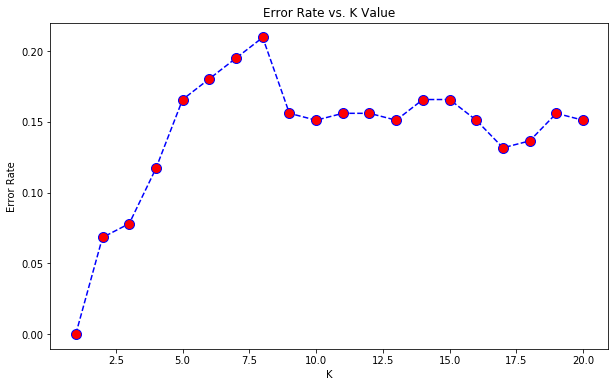

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
        # markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# decision tree classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
ds.fit(X_train, Y_train)
y_pred_ds = ds.predict(X_test)


In [80]:
cm_test = confusion_matrix(y_pred_ds, Y_test)
y_pred_train = ds.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)
y_pred_ds = ds.predict(X_test)
print()
score_dt = round(accuracy_score(y_pred_ds,Y_test)*100,2)

print("The accuracy score achieved using decision=========: "+str(score_dt)+" %")
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(Y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(Y_test)))
print("Confusion matrix",str(cm_test))


The accuracy score achieved using decision=========: 94.15 %
Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.9414634146341463
Confusion matrix [[ 85   8]
 [  4 108]]


In [81]:
print(classification_report(Y_test, y_pred_ds))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        89
           1       0.96      0.93      0.95       116

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205




# Random forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rn= RandomForestClassifier(n_estimators = 10)
rn.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
y_pred_rn = rn.predict(X_test)


In [84]:
cm_test = confusion_matrix(y_pred_rn, Y_test)
cm_test

array([[ 89,   3],
       [  0, 113]], dtype=int64)

In [85]:
y_pred_train = rn.predict(X_train)
cm_train = confusion_matrix(y_pred_train, Y_train)

In [86]:
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(Y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(Y_test)))

Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.9853658536585366


In [87]:
score_ra = round(accuracy_score(y_pred_rn,Y_test)*100,2)
print(score_ra)

print(classification_report(Y_test, y_pred_rn))

98.54
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.97      0.99       116

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205




# 6 Comparing Algorithm

In [88]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_ra]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","decision tree","Random forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.85 %
The accuracy score achieved using Naive Bayes is: 82.93 %
The accuracy score achieved using Support Vector Machine is: 86.83 %
The accuracy score achieved using K-Nearest Neighbors is: 84.88 %
The accuracy score achieved using decision tree is: 94.15 %
The accuracy score achieved using Random forest is: 98.54 %


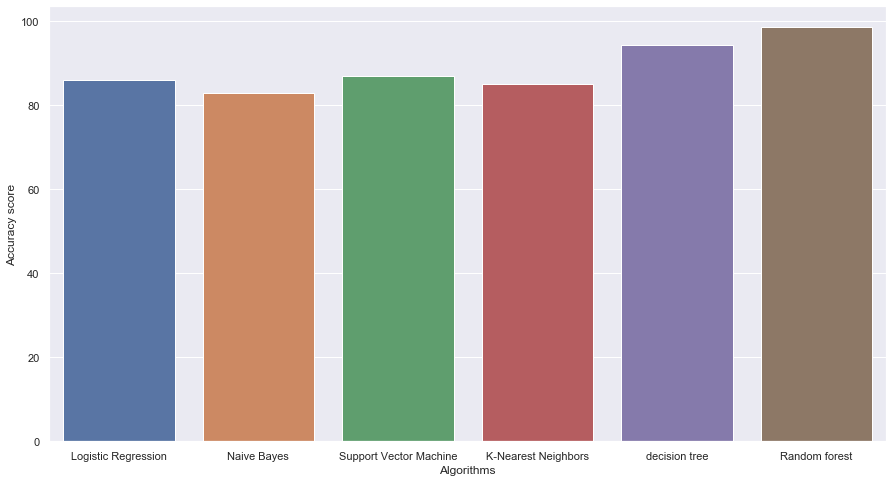

In [89]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

# SO THE RANDOM FOREST GIVE US A HIGEHST ACCURACY

In [91]:
pickle.dump(rn,open('model.pkl','wb'))

# prediction on validation  dataset

# Feature selection

univariate selection:Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
column=['age','sex','cp','tres','chol','fbs','rest','thala','exan','old','sp','ca','tha']

In [ ]:
X.shape

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
X=pd.DataFrame(X,columns=['age','sex','cp','tres','chol','fbs','rest','thala','exan','old','sp','ca','tha'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
features=fit.transform(X)


In [ ]:

for x,y in zip(df.columns,fit.scores_):
    print("{0}:\t{1:7.2f}".format(x,y))
#Transform data
features=fit.transform(X)
features=pd.DataFrame(features)
X.shape,features.shape
print(X.iloc[0:5,:].values)
print(features.iloc[0:5,:].values)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores


In [ ]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features


# feature importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)


In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


In [ ]:


X=pd.DataFrame(X,columns=column)


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")